Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../datos/german_credit_data.xls",index_col=0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [23]:
df["rango_edades"]=pd.cut(df["Age"], bins =(18,30,50,75), labels =("18-30","31-50","51-75"))
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,rango_edades
514,54,male,2,own,NaN,NaN,2255,24,car,51-75
598,31,male,2,own,little,NaN,2775,18,car,31-50
605,22,male,2,own,quite rich,little,2828,24,furniture/equipment,18-30


In [21]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

1- Hacer una exploración inicial del dataframe.
- ¿Cuántas filas tiene?
- ¿Cuántas nulos tiene?
- ¿Y duplicados?
- ¿Qué tipo de datos tenemos en el dataframe?
etc.

In [13]:
df.shape
#tiene 1000 filas y 9 columnas

(1000, 9)

In [5]:
df.isnull().sum()
# en Saving accounts tiene 183 nulos, y en Checking account tiene 394

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [14]:
df.duplicated().sum()
# no tenemos valores duplicados.

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


2- Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

1. Comprobar si hay una realación entre edad y el tenencia de casa.
2. Hay una realación entre la edad y la cantidad de credito solicitado.
3. Tipo de Housing y el proposito de la solicitud del credito

3- Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

<AxesSubplot:xlabel='Purpose', ylabel='count'>

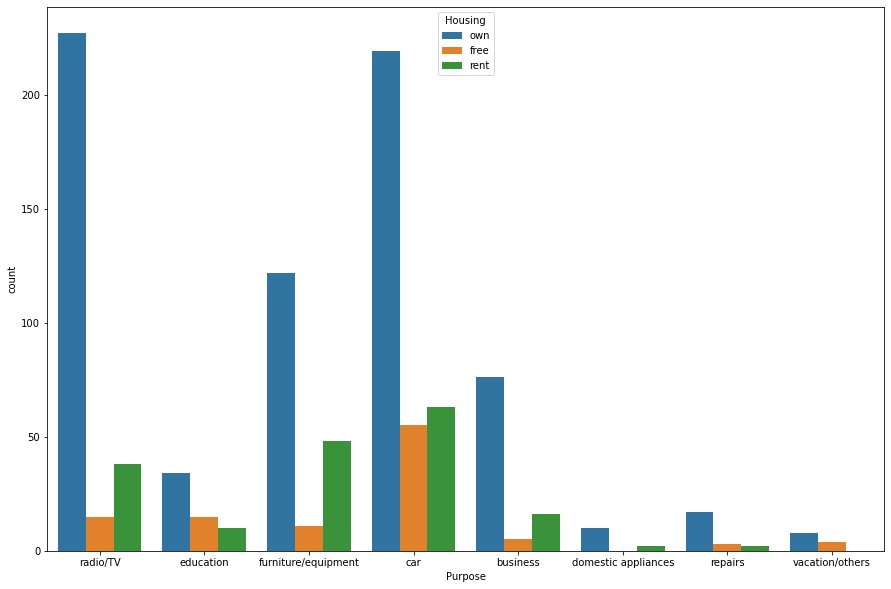

In [19]:
#Pregunta 3
plt.figure(figsize=(15,10))
sns.countplot(x="Purpose", data=df, hue="Housing")

Según los datos, vemos que en el tema de prestamos, para todos los casos quienes más piden prestamos, son las personas que ya tienen en propiedad una casa, siendo habitual destinar el dinero del prestamo para comprar un coche, radio/tv y muebles/equipamiento para la casa.


<AxesSubplot:>

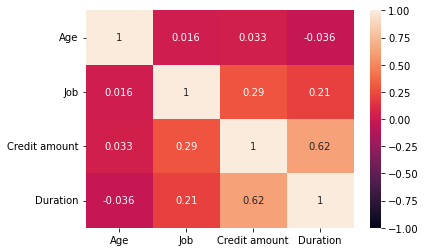

In [20]:
# edad y crédito solicitado.

sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1)

En nuestras variables númericas no vemos elevada correlación entre los datos. Hay una mayor relación entre la cantidad de crédito en tiempo de pago de éste (0.62)